In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])

In [2]:
from mlgrad.model import LinearModel
from mlgrad.func import Square
from mlgrad.loss import ErrorLoss

from mlgrad.risk import ER
from mlgrad import erm_fg

In [118]:
N = 2500
X = 2*np.random.rand(N)-1
Y = 2*np.random.rand(N)-1
Z0 = X - 2*Y + 1

dZ = 2*np.random.rand(N)-1
dZ = 0.5 * dZ
Z = Z0 + dZ

M = N//5

Z_o = Z.copy()

for i in range(N):
    if 0.6 <= X[i] <= 1.0 and 0.6 <= Y[i] <= 1.0:
        Z_o[i] += 6
    if -1.0 <= X[i] <= -0.6 and -1.0 <= Y[i] <= -0.6:
        Z_o[i] -= 6


In [127]:
linmod_ls = LinearModel(2)
linmod_ls.init_param()
linmod_ls_o = LinearModel(2)
linmod_ls_o.init_param()

In [132]:
loss_sq = ErrorLoss(Square())

XY = np.c_[X, Y]
risk_ls = ER(XY, Z, linmod_ls, loss_sq)
fg_ls = erm_fg(risk_ls, h=0.1)
print(linmod_ls.param.base)
print(risk_ls.lval)

[ 1.01383771  1.00902468 -1.97585718]
0.04107015811712511


In [135]:
risk_ls_o = ER(XY, Z_o, linmod_ls_o, loss_sq)
fg_ls_o = erm_fg(risk_ls_o, h=0.1)
print(linmod_ls_o.param.base)
print(risk_ls_o.lval)

[ 0.95156814  2.08924631 -0.91102077]
0.9723385398682929


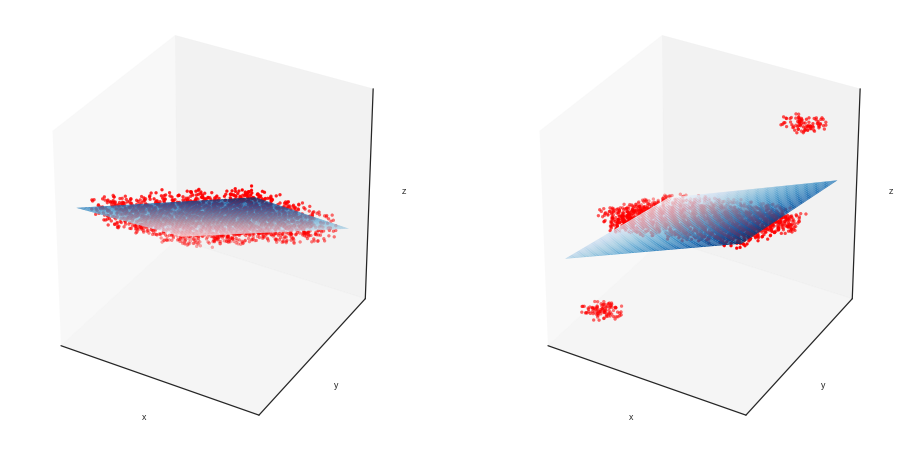

In [142]:
plt.figure(figsize=(16.0, 8.0))
fig = plt.gcf()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc1 = ax1.scatter3D(X, Y, Z, s=9, c='r')

xrange = np.linspace(-1.1,1.1,100)
yrange = np.linspace(-1.1,1.1,100)
xxrange, yyrange = np.meshgrid(xrange, yrange)
xygrid = np.c_[xxrange.ravel(), yyrange.ravel()]
zrange = linmod_ls.evaluate_all(xygrid)
zrange = np.array(zrange)
zzrange = zrange.reshape(xxrange.shape)
sf1 = ax1.plot_surface(xxrange, yyrange, zzrange, cmap=plt.cm.Blues)

plt.minorticks_on()
plt.grid(1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
# ax1.set_xlim(-1,1)
# ax1.set_ylim(-1,1)
# ax1.set_zlim(-2,4)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc2 = ax2.scatter3D(X, Y, Z_o, s=9, c='r')

xrange = np.linspace(-1.1,1.1,100)
yrange = np.linspace(-1.1,1.1,100)
xxrange, yyrange = np.meshgrid(xrange, yrange)
xygrid = np.c_[xxrange.ravel(), yyrange.ravel()]
zrange = linmod_ls_o.evaluate_all(xygrid)
zrange = np.array(zrange)
zzrange = zrange.reshape(xxrange.shape)

sf2 = ax2.plot_surface(xxrange, yyrange, zzrange, cmap=plt.cm.Blues)

plt.minorticks_on()
plt.grid(1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

plt.show()